<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/Gradient_Boost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Necessary Libraries**

In [117]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# **Loading the Dataset**

In [118]:
# Loading the Dataset
data = pd.read_excel("/content/drive/MyDrive/risk-prediction/Dataset/updated_chemical_import_risk_data.xlsx")

In [119]:
# Displaying the Dataset Head
data.head()

,Importer_ID,Import_Frequency,Import_Quantity (kg),Chemical_Name,HS Code,Country_of_Origin,Importation_Description,Compliance_History,Past_Violations,Financial_Stability,Risk_Category
0,IMP001,36,5199,"Fluorides; fluorosilicates, fluoroaluminates, ...",282619,Pakistan,Used in aluminum smelting & glass manufacturing,Excellent,4,High,Risky
1,IMP002,26,3398,Sulphuric acid; oleum,280700,Brazil,Petroleum refining & chemical synthesis,Poor,1,High,Not Risky
2,IMP003,47,5626,Sulphuric acid; oleum,280700,India,Petroleum refining & chemical synthesis,Average,5,Medium,Risky
3,IMP004,91,7700,Cyanides and cyanide oxides: Of sodium,283711,India,Gold mining & electroplating industry,Excellent,4,Medium,Not Risky
4,IMP005,63,8377,Nitric acid; sulphonitric acids,280800,China,Used in fertilizer manufacturing & explosives ...,Average,4,Low,Not Risky


# **Exploratory Data Analysis**

In [120]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              100 non-null    object
 1   Import_Frequency         100 non-null    int64 
 2   Import_Quantity (kg)     100 non-null    int64 
 3   Chemical_Name            100 non-null    object
 4   HS Code                  100 non-null    int64 
 5   Country_of_Origin        100 non-null    object
 6   Importation_Description  100 non-null    object
 7   Compliance_History       100 non-null    object
 8   Past_Violations          100 non-null    int64 
 9   Financial_Stability      100 non-null    object
 10  Risk_Category            100 non-null    object
dtypes: int64(4), object(7)
memory usage: 8.7+ KB


### **Identifying Categorical and Numerical Columns**

In [121]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [122]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- Importer_ID
- Chemical_Name
- Country_of_Origin
- Importation_Description
- Compliance_History
- Financial_Stability
- Risk_Category

Data Type of Categorical Features:
Importer_ID                object
Chemical_Name              object
Country_of_Origin          object
Importation_Description    object
Compliance_History         object
Financial_Stability        object
Risk_Category              object
dtype: object


**Unique Values and Their Counts Relevant to Each Categorical Column**

In [123]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

Importer_ID
IMP001    1
IMP064    1
IMP074    1
IMP073    1
IMP072    1
         ..
IMP031    1
IMP030    1
IMP029    1
IMP028    1
IMP100    1
Name: count, Length: 100, dtype: int64
 
Chemical_Name
Bromine                                                                           12
Chlorine                                                                          11
Chlorates and perchlorates; bromates and perbromates; iodates and periodates      11
Iodine                                                                             9
Mineral or chemical fertilizers, nitrogenous                                       9
Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts     8
Cyanides and cyanide oxides: Other                                                 8
Hydrogen peroxide, whether or not solidified with urea                             8
Sulphuric acid; oleum                                

In [124]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:


In [125]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:


## **Numerical Features**

In [126]:
# Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Import_Frequency', 'Import_Quantity (kg)', 'HS Code',
       'Past_Violations'],
      dtype='object')


In [127]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

Import_Frequency
63     4
66     3
59     3
37     3
100    3
26     3
9      3
25     3
99     3
78     2
19     2
58     2
36     2
21     2
23     2
32     2
52     2
67     2
51     2
73     2
49     2
82     2
57     2
91     2
60     2
33     2
46     2
7      2
47     2
95     2
74     2
62     1
76     1
80     1
96     1
22     1
17     1
15     1
50     1
77     1
84     1
40     1
61     1
70     1
54     1
55     1
11     1
12     1
41     1
5      1
89     1
85     1
87     1
81     1
42     1
83     1
72     1
90     1
68     1
Name: count, dtype: int64
 
Import_Quantity (kg)
5199     1
1557     1
10770    1
16272    1
9028     1
        ..
1793     1
2175     1
18176    1
5145     1
2622     1
Name: count, Length: 100, dtype: int64
 
HS Code
280130    12
280110    11
282911    11
280120     9
310210     9
282619     8
283719     8
284700     8
280700     7
283711     6
282611     6
280800     5
Name: count, dtype: 

**Numerical columns with null values and their relevant counts**

In [128]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_cols:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:


# **Data Preprocessing**

## **Data Cleaning**

In [129]:
# Step 1: Removing whitespaces from the object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [130]:
# Step 2: Dropping duplicate values
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [131]:
# Display dataset information
print("\nDataset information after removing duplicates:")
data.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              100 non-null    object
 1   Import_Frequency         100 non-null    int64 
 2   Import_Quantity (kg)     100 non-null    int64 
 3   Chemical_Name            100 non-null    object
 4   HS Code                  100 non-null    int64 
 5   Country_of_Origin        100 non-null    object
 6   Importation_Description  100 non-null    object
 7   Compliance_History       100 non-null    object
 8   Past_Violations          100 non-null    int64 
 9   Financial_Stability      100 non-null    object
 10  Risk_Category            100 non-null    object
dtypes: int64(4), object(7)
memory usage: 8.7+ KB


In [132]:
# Step 3: Dropping irrelevant columns if necessary
data = data.drop(columns=["Importer_ID"])

# **Data Encoding**

In [133]:
# Step 4: Handling categorical variables
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(data[categorical_cols])

# Convert to DataFrame
cat_data = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# **Handling Outliers in the Numerical Columns**

In [134]:
# Step 5: Handling Numerical features
numerical_cols = ["Import_Frequency", "HS Code", "Past_Violations", "Import_Quantity (kg)"]


In [135]:
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data[numerical_cols])
num_data = pd.DataFrame(numerical_data, columns=numerical_cols)

In [136]:
# Step 6: Target variable (Risk_Category)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Risk_Category"])

In [137]:
# Combining processed features
X = pd.concat([num_data, cat_data], axis=1)

In [138]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

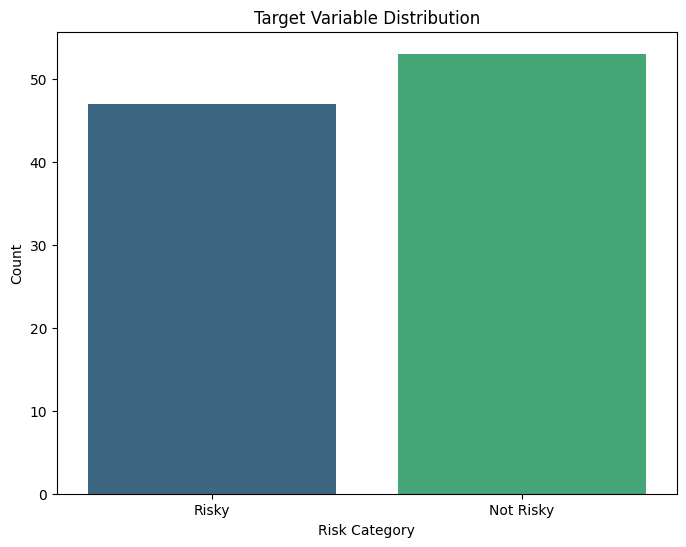

In [139]:
# Set Style
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk_Category', data=data, palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

# **Balancing the Target Variable**

In [140]:
# Handling the imbalance dataset

# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)

Original dataset size: (100, 42)
Resampled dataset size: (106, 42)


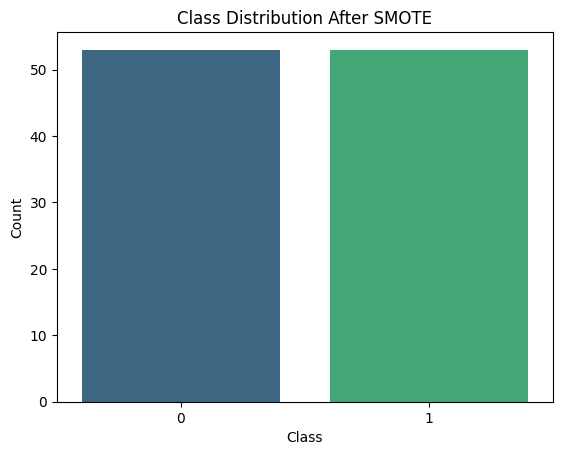

In [141]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [142]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

Shape of X_resampled: (106, 42)
Shape of y_resampled: (106,)


In [143]:
# Displaying the Columns in X
print("Columns in X Resampled:")
print(X_resampled.columns)

Columns in X Resampled:
Index(['Import_Frequency', 'HS Code', 'Past_Violations',
       'Import_Quantity (kg)',
       'Chemical_Name_Chlorates and perchlorates; bromates and perbromates; iodates and periodates',
       'Chemical_Name_Chlorine',
       'Chemical_Name_Cyanides and cyanide oxides: Of sodium',
       'Chemical_Name_Cyanides and cyanide oxides: Other',
       'Chemical_Name_Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts',
       'Chemical_Name_Halides and halide oxides of non-metals',
       'Chemical_Name_Hydrogen peroxide, whether or not solidified with urea',
       'Chemical_Name_Iodine',
       'Chemical_Name_Mineral or chemical fertilizers, nitrogenous',
       'Chemical_Name_Nitric acid; sulphonitric acids',
       'Chemical_Name_Sulphuric acid; oleum', 'Country_of_Origin_Canada',
       'Country_of_Origin_China', 'Country_of_Origin_France',
       'Country_of_Origin_Germany', 'Country_of_Origin_India',
       'Country_of_Origin_Japan

In [144]:
# Standardizing the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [145]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [146]:
# Displaying the Dataset Information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Import_Frequency         100 non-null    int64 
 1   Import_Quantity (kg)     100 non-null    int64 
 2   Chemical_Name            100 non-null    object
 3   HS Code                  100 non-null    int64 
 4   Country_of_Origin        100 non-null    object
 5   Importation_Description  100 non-null    object
 6   Compliance_History       100 non-null    object
 7   Past_Violations          100 non-null    int64 
 8   Financial_Stability      100 non-null    object
 9   Risk_Category            100 non-null    object
dtypes: int64(4), object(6)
memory usage: 7.9+ KB
None


# **Model Training**

# **Model Based on Gradient Boost**

In [147]:
# Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [148]:
# Predictions
y_pred = model.predict(X_test)

In [149]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

Optimized Model Accuracy: 0.55


In [150]:
# Generate the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.54      0.64      0.58        11

    accuracy                           0.55        22
   macro avg       0.55      0.55      0.54        22
weighted avg       0.55      0.55      0.54        22

